#### Linear Regression with Sklearn

In [29]:
# import the boston dataset
from sklearn.datasets import load_boston
# import pandas
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import regression model
from sklearn.linear_model import LinearRegression
# import the train test split method
from sklearn.model_selection import train_test_split

In [15]:
# load the dataset and read the description
boston_data = load_boston()
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [16]:
# put the column names in a list
column_names = [name.lower() for name in boston_data.feature_names]

# load the dataset into a Pandas dataframe
boston_df = pd.DataFrame(boston_data.data, columns=column_names)

# Set the regression target: the column 'medv' (median value of owner-occupied homes in $1000's)
boston_df['medv'] = boston_data.target

# Print the dataframe
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# Print the dataframe info: column names, data type, etc
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null float64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null float64
tax        506 non-null float64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


#### EDA

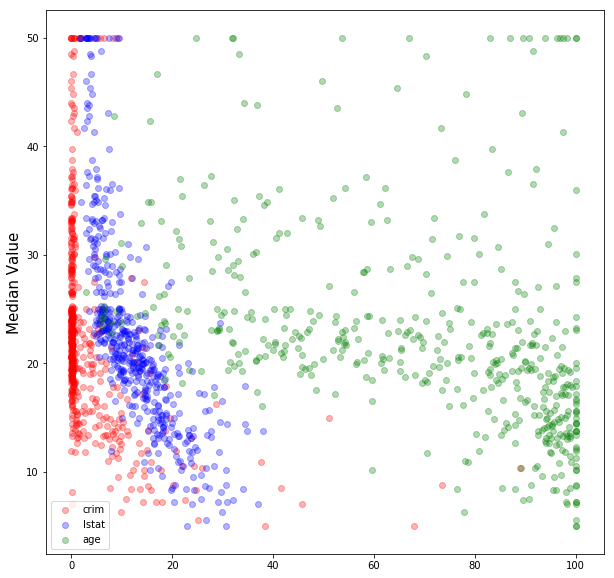

In [22]:
# Establish the canvas
fig = plt.figure(figsize=(10, 10))
# On the canvas, add a plot (nrows, ncols, index) (change these if you want more plots on the canvas)
ax = fig.add_subplot(1, 1, 1)
# Establish the colours of each predictor, create a scatterplot of these
for feature, color in zip(['crim', 'lstat', 'age'], ['r', 'b', 'g']):
    ax.scatter(x=boston_df[feature].values, y=boston_df.medv.values,
               color=color, alpha=0.3, label=feature)
# Set the label and legend
ax.set_ylabel('Median Value', size=15)
ax.legend(loc='best');

# Keep in mind that the predictors are of different scales plotted on the same X axis;
# not a big problem, just remember as you continue EDA.

#### Linear Regression / No Train Test Split

In [32]:
# Establish your features and response variables
X = boston_df.drop('medv', axis=1).values
y = boston_df.medv.values

# Create the model blueprint
linear_model = LinearRegression()

# Fit the model to the features and response
linear_model.fit(X, y)

# Print the score of the model
score = linear_model.score(X, y)
print('R2:', score)

R2: 0.740607742865


#### Linear Regression / Train Test Split

In [33]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Fit the linear model to the train data only
linear_model.fit(X_train, y_train)

# Score the model on the test set
test_score = linear_model.score(X_test, y_test)
print('R2:', test_score)

R2: 0.683955724318


In [35]:
# To drive the train test split point home:
train_score = linear_model.score(X_train, y_train)
print('Train R2:', train_score)
print('Test R2:', test_score)

Train R2: 0.748105199059
Test R2: 0.683955724318
